# Lab 5: Word2vec

In this lab, we will see how [word2vec](https://arxiv.org/pdf/1301.3781.pdf) can be used to produce word embedding vectors for each word in our vocabulary. We will use word analogies to test our vectors, and we will finally visualise words and that are close to each other in the vector space, which suggests that they are similar.

word2vec is a word embedding representation of text, that allows each word of the vocabulary to be represented as a vector of real numbers. It learns vector representations using a shallow neural network and a local sliding window around a given word. Words that appear in similar contexts in the training corpus are located close to each other in the embedding vector space.

#### Why word embeddings?

Consider the following sentences:

S1: "I think this is a good approach."

S2: "I think this is a nice approach."

Their meaning is the same, although S1 describes the approach as "good" and S2 as "nice". We need a word representation that treats "good" and "nice" as being similar.

## cbow and skipgram

There are two versions of the word2vec architecture: cbow (continuous bag-of-words) and skip-gram.

### cbow
Given the context (i.e., one or more context words) of each word, predict the word corresponding to this context.

##### How does the sliding window work with cbow?
We look n-words to the left and n-words to the right of the target word.

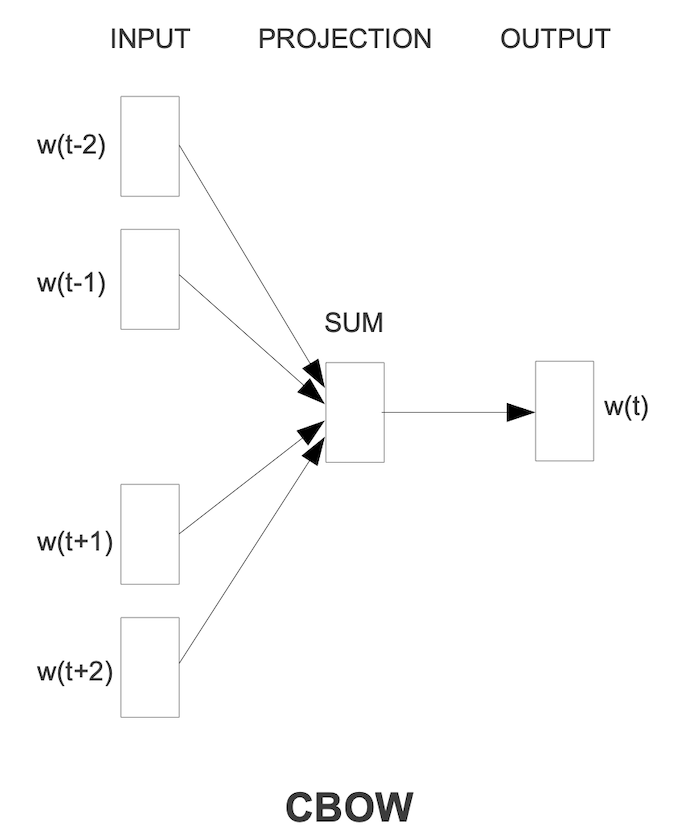

### skip-gram

Given a word, predict the neighbouring words (context).

##### How does the sliding window work with cbow?
We try to predict n-words to the left and n-words to the right of the given word.

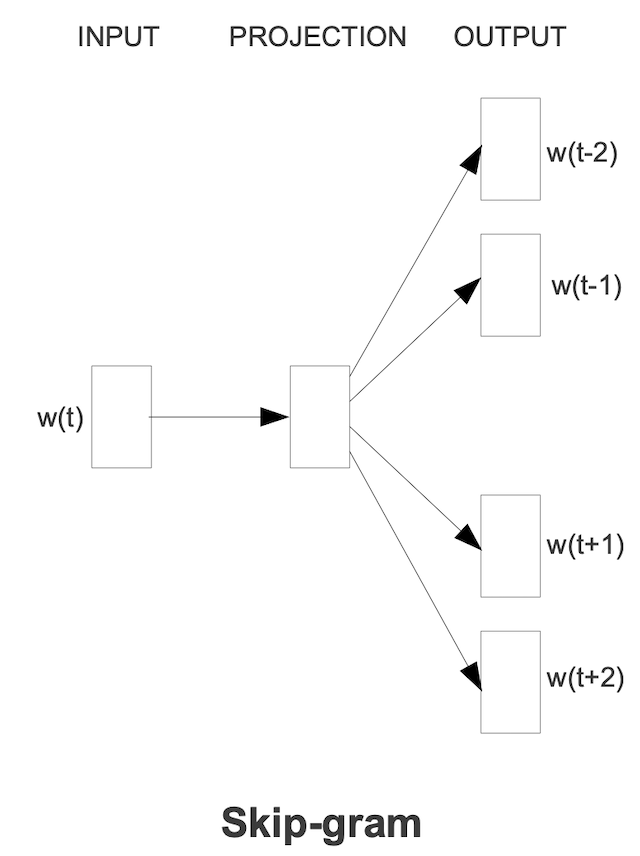

## cbow vs. skip-gram

Overall:
* cbow is faster
* cbow tends to represent more frequent words better
* skip-gram can work well with small amount of data compared to cbow
* skip-gram tends to represent rare words better

The above, however, are affected by factors such as the task, data, training parameters, etc.

## How can word2vec word embeddings be used?
Three approaches:
- Use pre-trained models.
- Train our own models on a corpus, using an existing implementation (e.g. gensim).
- Train our own models on a corpus, implementing word2vec from scratch.

We will be working with the Gensim implementation. For more help, you can refer to the documentation [[1]](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec), [[2]](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.evaluate_word_analogies), as well as this [tutorial](https://rare-technologies.com/word2vec-tutorial/).

In [1]:
import re
import gensim
from gensim.models import Word2Vec

# corpora for training our word embeddings
import nltk
from nltk.corpus import brown
from nltk.corpus import abc

In [2]:
# # You may need to run the following if you are getting errors:
#
# !pip install gensim
#
import nltk
nltk.download('brown')
nltk.download('abc')
nltk.download('punkt')
# # you can also try nltk.download()

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package abc to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package abc is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

The word2vec implementation by Gensim requires as input a list of sentences. Each sentence should be represented as a list of words, so our corpus should be in the form of a list of lists.


See more about the ```.sents()``` method in NLTK corpora:
[NLTK Ch.2](https://www.nltk.org/book/ch02.html) and 
[Documentation](https://www.nltk.org/howto/corpus.html)

In [3]:
def corpus_normalise(corpus):
    corpus_norm = []
    for sent in corpus.sents():
        sent = re.sub('[^a-z0-9]+', ' ', ' '.join(sent).lower()) # lowercase, remove punctuation & non-alphanumeric characters
        corpus_norm.append(sent.strip().split())
    return corpus_norm

corpus_norm = corpus_normalise(abc)
                      
for sentence in corpus_norm[:5]: # show the first 5 sentences of the corpus
    print(sentence)

['pm', 'denies', 'knowledge', 'of', 'awb', 'kickbacks', 'the', 'prime', 'minister', 'has', 'denied', 'he', 'knew', 'awb', 'was', 'paying', 'kickbacks', 'to', 'iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'iraq', 'wheat', 'sales']
['letters', 'from', 'john', 'howard', 'and', 'deputy', 'prime', 'minister', 'mark', 'vaile', 'to', 'awb', 'have', 'been', 'released', 'by', 'the', 'cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program']
['in', 'one', 'of', 'the', 'letters', 'mr', 'howard', 'asks', 'awb', 'managing', 'director', 'andrew', 'lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'government', 'on', 'iraq', 'wheat', 'sales']
['the', 'opposition', 's', 'gavan', 'o', 'connor', 'says', 'the', 'letter', 'was', 'sent', 'in', '2002', 'the', 'same', 'time', 'awb', 'was', 'paying', 'kickbacks', 'to', 'iraq', 'though', 'a', 'jordanian', 'trucking', 'company']
['he', 'says', 'the', 'government

## Training a cbow model

Some of the most important Word2Vec parameters, from Gensim's documentation:
- min_count (default=5) ignore words that appear less than min_count times (usually between 0-100).
- vector_size (default=100)
- window (default=5) the sliding window size
- sg (default=0) 0=cbow, 1=skipgram

We will now train our CBOW word embeddings on the NLTK abc corpus.

In [4]:
model_cbow = Word2Vec(corpus_norm, epochs=10, seed=42, workers=2)

Now we will define a function that will be returning the n most similar words to a target word:

In [5]:
def return_topn_similar(model, word, n=10):
    n_sim = []
    for item in model.most_similar(word, topn=n):
        n_sim.append(item)
    return n_sim
        
return_topn_similar(model_cbow.wv, 'man')

[('woman', 0.8342450857162476),
 ('dinosaur', 0.7432495355606079),
 ('creature', 0.7067891359329224),
 ('minute', 0.70549476146698),
 ('fortnight', 0.6993235349655151),
 ('male', 0.6968285441398621),
 ('supernova', 0.6876257061958313),
 ('actor', 0.6864420175552368),
 ('camel', 0.6811297535896301),
 ('artist', 0.6686481833457947)]

In [6]:
return_topn_similar(model_cbow.wv, 'woman')

[('man', 0.8342451453208923),
 ('repeat', 0.7048304080963135),
 ('camel', 0.6801961064338684),
 ('belonging', 0.6740506887435913),
 ('complete', 0.6580759882926941),
 ('completing', 0.657224714756012),
 ('born', 0.6518393754959106),
 ('reprieve', 0.6512385606765747),
 ('male', 0.6441656351089478),
 ('men', 0.6429992318153381)]

Next, we will train cbow using different window sizes, and compare the topn most similar words.

In [7]:
window_sizes = [2, 5, 10, 50]
models = []
for window_size in window_sizes:
    model = Word2Vec(corpus_norm, vector_size=200, window=window_size, min_count=5, seed=42, workers=1)
    models.append(model)

In [8]:
def print_topn_per_window(models, word, window_sizes, topn):
    for i in range(len(window_sizes)):
        print(f'window size={window_sizes[i]}')
        [print(item) for item in return_topn_similar(models[i].wv, word, topn)]
        print()
        
print('Word: man\n')
print_topn_per_window(models, 'man', window_sizes, 5)
print('\n\nWord: woman\n')
print_topn_per_window(models, 'woman', window_sizes, 5)

Word: man

window size=2
('disc', 0.93134605884552)
('woman', 0.9291711449623108)
('male', 0.9273205399513245)
('portraits', 0.9262880682945251)
('star', 0.9261294603347778)

window size=5
('woman', 0.9472049474716187)
('jurassic', 0.938840925693512)
('dinosaur', 0.929879903793335)
('fortnight', 0.9292659163475037)
('radius', 0.9285058975219727)

window size=10
('inches', 0.9511735439300537)
('death', 0.9403210282325745)
('1930', 0.938888669013977)
('wolf', 0.9342043399810791)
('jurassic', 0.933478057384491)

window size=50
('existence', 0.9693407416343689)
('earliest', 0.9636611938476562)
('pulsars', 0.9632806777954102)
('birth', 0.9614446759223938)
('sister', 0.961365282535553)



Word: woman

window size=2
('room', 0.9527995586395264)
('child', 0.9485065340995789)
('bought', 0.9442906975746155)
('broken', 0.9426327347755432)
('fine', 0.9426114559173584)

window size=5
('man', 0.9472049474716187)
('actor', 0.9361141324043274)
('eclipse', 0.9206527471542358)
('site', 0.916875898838043

You can try training cbow using different minimum count values, and compare the topn most similar words.

min_count stands for the minimum frequency value that is considered for a word. If the frequency of this word in the corpus is lower than min_count, then it is ignored

In [9]:
# your code here
window_sizes = [2, 5, 10, 50]
models_2 = []
for window_size in window_sizes:
    model = Word2Vec(corpus_norm, vector_size=200, window=window_size, min_count=20, seed=42, workers=1)  #change min_count = 10
    print(modeal)
    models_2.append(model)
#print(models_2)

Word2Vec<vocab=3580, vector_size=200, alpha=0.025>
Word2Vec<vocab=3580, vector_size=200, alpha=0.025>
Word2Vec<vocab=3580, vector_size=200, alpha=0.025>
Word2Vec<vocab=3580, vector_size=200, alpha=0.025>


In [10]:
print('Word: man\n')
print_topn_per_window(models_2, 'man', window_sizes, 5)

Word: man

window size=2
('woman', 0.938530683517456)
('dog', 0.9192264080047607)
('star', 0.8934250473976135)
('game', 0.8905143141746521)
('shakespeare', 0.8806819319725037)

window size=5
('woman', 0.9264508485794067)
('twice', 0.9086658954620361)
('star', 0.8922054767608643)
('galaxy', 0.8918356895446777)
('explosion', 0.8868725895881653)

window size=10
('woman', 0.915356457233429)
('explosion', 0.8982322812080383)
('detected', 0.8861085176467896)
('original', 0.8857097625732422)
('site', 0.8818821907043457)

window size=50
('greek', 0.947059690952301)
('earliest', 0.9379627704620361)
('ancestor', 0.9379037022590637)
('skull', 0.9365652203559875)
('cave', 0.9338845610618591)



In [11]:
print('Word: woman\n')
print_topn_per_window(models_2, 'woman', window_sizes, 5)

Word: woman

window size=2
('dog', 0.9408319592475891)
('moratorium', 0.9407191872596741)
('man', 0.9385308027267456)
('shakespeare', 0.929247260093689)
('delayed', 0.9221893548965454)

window size=5
('man', 0.9264509081840515)
('complete', 0.9242842793464661)
('teeth', 0.9172596335411072)
('vessel', 0.9165170192718506)
('shock', 0.9105389714241028)

window size=10
('version', 0.9207592606544495)
('man', 0.9153563976287842)
('mammal', 0.9125535488128662)
('explosion', 0.9099727869033813)
('cave', 0.9003552198410034)

window size=50
('bones', 0.9446477293968201)
('foot', 0.9409596920013428)
('man', 0.9297533631324768)
('version', 0.9267158508300781)
('skull', 0.9233364462852478)



## Analogies

Let's try to make word analogies and see how our model performs. Then, cosider the following:
- Which word did you expect to get?
- Did you get the expected word?
- Can you think of possible reasons why this happened?

You can experiment with further analogies. Note that an error will be raised if you try out-of-vocabulary words.

In [12]:
def analogy(model, x1, x2, y1):  # if x1 is analogous to x2, then y1 is analogous to?
    return model.most_similar(positive=[y1, x2], negative=[x1], topn=1)[0]

In [13]:
def print_analogies(model):
    print('man -> king, woman -> ?')
    print(analogy(model, "man", "king", "woman"))
    print()
    print('athens -> greece, london -> ?')
    print(analogy(model, "athens", "greece", "london"))
    print()
    print('france -> paris, england -> ?')
    print(analogy(model, "france", "paris", "england"))
    print()
    print('acceptable -> unacceptable, certain -> ?')
    print(analogy(model, "acceptable", "unacceptable", "certain"))

In [14]:
print_analogies(model_cbow.wv)

man -> king, woman -> ?
('county', 0.7174890637397766)

athens -> greece, london -> ?
('sydney', 0.7963739633560181)

france -> paris, england -> ?
('schofield', 0.8055298924446106)

acceptable -> unacceptable, certain -> ?
('number', 0.6915728449821472)


## Repeat on larger corpora

We will now try to increase our corpus (using the NLTK Brown corpus) and test the analogies again.

An alternative way of doing this is by applying the ```train()``` and ```build_vocab()``` methods from Gensim to our already trained ```model_cbow```. Refer to the [documentation](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec) for details. Note that you should refer to the number of epochs, the number of examples (i.e., sentences) and also decide how words in the second corpus that don't exist in the first corpus should be treated.

In [15]:
corpus_extended = corpus_normalise(abc)
b = corpus_normalise(brown)
corpus_extended.extend(b)

model_cbow2 = Word2Vec(corpus_extended, epochs=5, seed=42, workers=1)

In [16]:
print_analogies(model_cbow2.wv)

man -> king, woman -> ?
('boston', 0.861602783203125)

athens -> greece, london -> ?
('club', 0.8857790231704712)

france -> paris, england -> ?
('york', 0.8414938449859619)

acceptable -> unacceptable, certain -> ?
('genes', 0.7579869627952576)


We will try again with a larger, pre-trained model (trained on Google News):

In [17]:
import gensim.downloader
w2v_gnews = gensim.downloader.load('word2vec-google-news-300') # warnings while the model is being downloaded may appear, you can ignore them

In [18]:
print_analogies(w2v_gnews)

man -> king, woman -> ?
('queen', 0.7118193507194519)

athens -> greece, london -> ?
('europe', 0.5646026134490967)

france -> paris, england -> ?
('ronnie', 0.5300812125205994)

acceptable -> unacceptable, certain -> ?
('unjustified', 0.4622364938259125)


Do you notice any change? Why?

It is worth noting that before training our models, we turned all text into lowercase. This is not the case for all word2vec models though. Notice how the results change now:

In [19]:
analogy(w2v_gnews, "Athens", "Greece", "London")

('Britain', 0.5646188259124756)

In [20]:
analogy(w2v_gnews, "France", "paris", "england")

('london', 0.6486772298812866)

In [21]:
analogy(w2v_gnews, "acceptable", "unacceptable", "certain")

('unjustified', 0.4622364938259125)

## Evaluation on analogies
We will now test how our models perform on a collection of analogies. (based on https://code.google.com/archive/p/word2vec/ )

In [22]:
from gensim.test.utils import datapath

def evaluate_analogies(model):
    return model.evaluate_word_analogies(datapath('questions-words.txt'))[0]

In [23]:
evaluate_analogies(model_cbow.wv) # evaluate the cbow model that we trained on the abc corpus

0.04968103614923642

In [24]:
evaluate_analogies(model_cbow2.wv) # evaluate the cbow model that we trained on the abc and Brown corpora

0.04567135702361078

In [25]:
evaluate_analogies(w2v_gnews) # this is a bit slower (evaluation of Google News word embeddings)

0.7401448525607863

## Visualisation

Finally, for each of our models, we can visualise the topn most similar words for each word in a list. Feel free to experiment with different words in the ```keys``` list.

In [26]:
keys = ['Paris', 'London', 'Athens', 'paris', 'london', 'athens', 'Greece', 'greece', 'France',
        'france', 'England', 'england', 'man', 'woman', 'king', 'queen']

In [29]:
from sklearn.manifold import TSNE
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline


def get_clusters_for_tsne(model, keys, topn=20):
    embedding_clusters = []
    word_clusters = []
    final_keys = []
    for word in keys:
        if word in model:
            embeddings = []
            words = []
            final_keys.append(word)
            for similar_word, _ in model.most_similar(word, topn):
                words.append(similar_word)
                embeddings.append(model[similar_word])
            embedding_clusters.append(embeddings)
            word_clusters.append(words)
    
    embedding_clusters = np.array(embedding_clusters)
    n, m, k = embedding_clusters.shape
    tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

    return embeddings_en_2d, word_clusters, final_keys


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_4556\3050296944.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


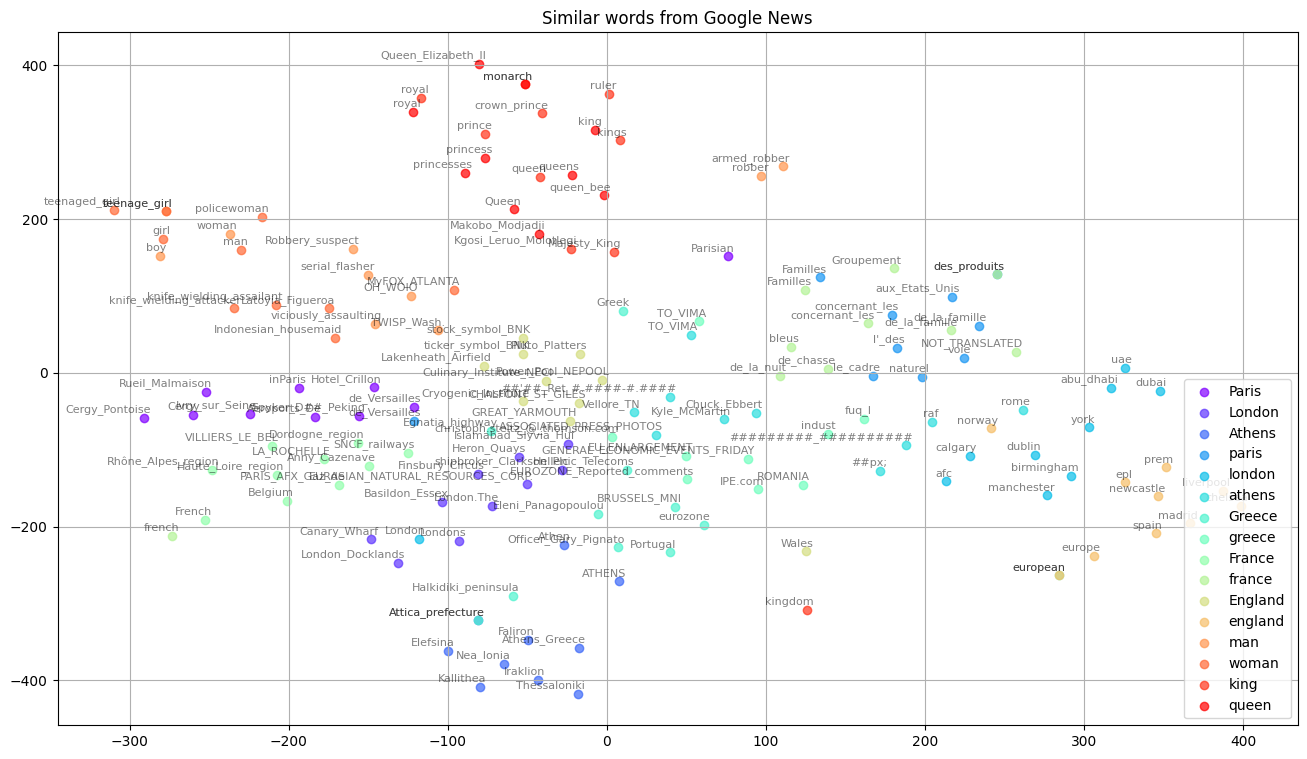

In [30]:
embeddings_w2v_gnews, word_clusters_w2v_gnews, final_keys_w2v_gnews =  get_clusters_for_tsne(w2v_gnews, keys)

tsne_plot_similar_words('Similar words from Google News', final_keys_w2v_gnews, embeddings_w2v_gnews, word_clusters_w2v_gnews, 0.7,
                        'similar_words.png')

C:\Users\admin\AppData\Local\Temp\ipykernel_4556\3050296944.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


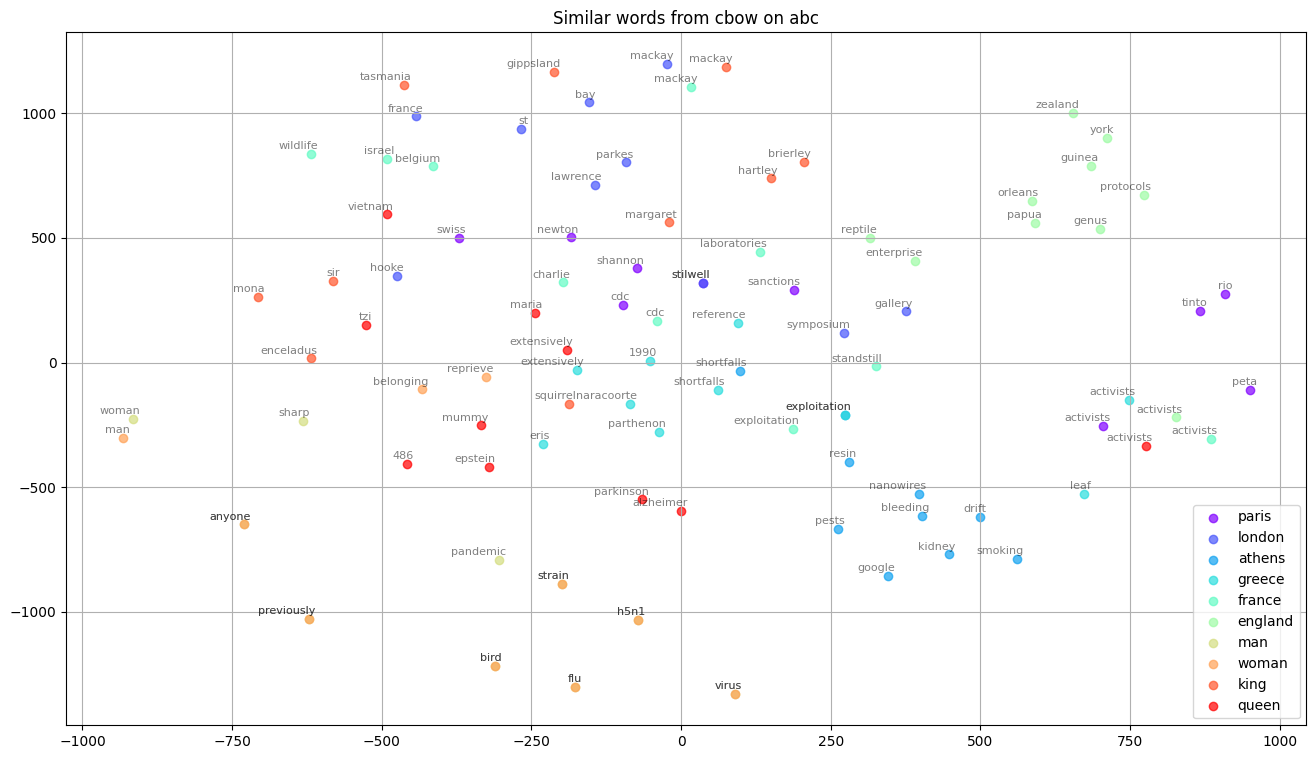

In [31]:
embeddings_model_cbow, word_clusters_model_cbow, final_keys_model_cbow =  get_clusters_for_tsne(model_cbow.wv, keys)

tsne_plot_similar_words('Similar words from cbow on abc', final_keys_model_cbow, embeddings_model_cbow, word_clusters_model_cbow, 0.7,
                        'similar_words_cbow.png')

You can repeat visualisation for cbow2

C:\Users\admin\AppData\Local\Temp\ipykernel_4556\3050296944.py:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


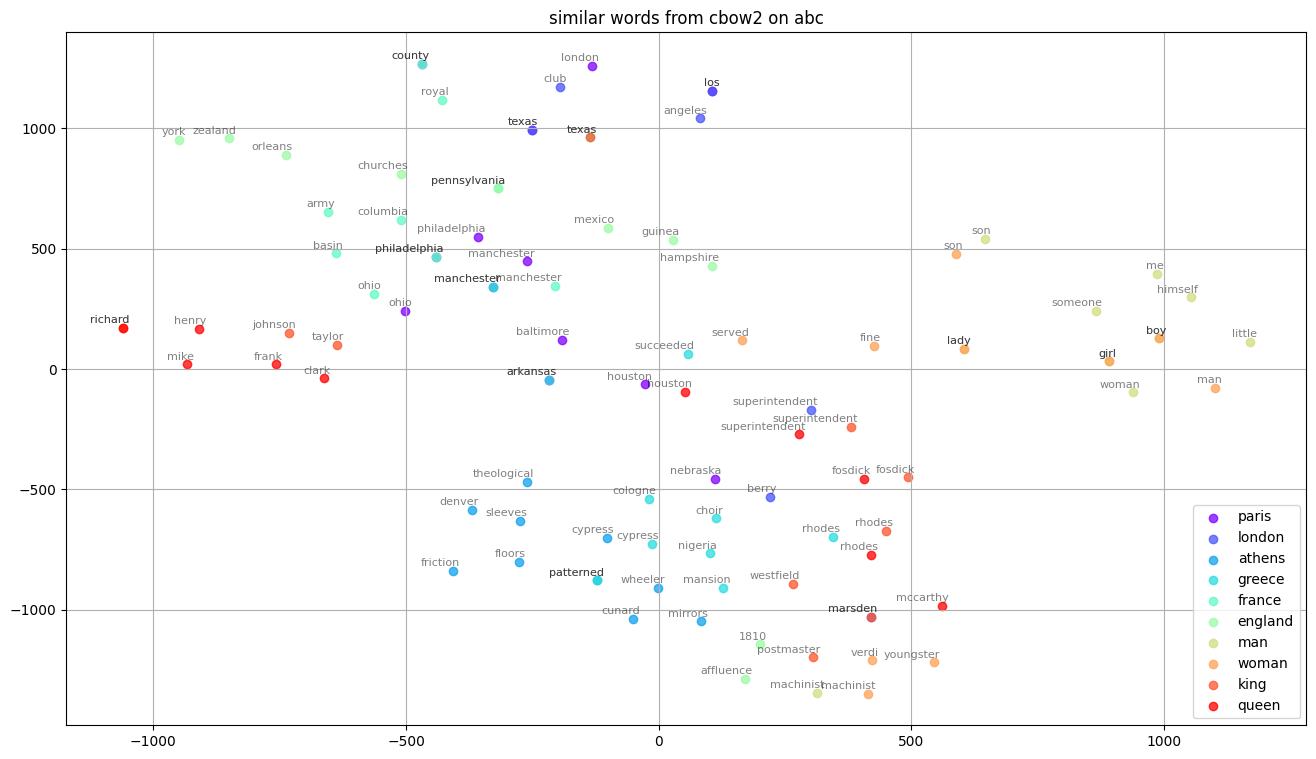

In [33]:
embedding_model_cbow, word_clusters_model_cbow, final_keys_model_cbow = get_clusters_for_tsne(model_cbow2.wv, keys)
tsne_plot_similar_words('similar words from cbow2 on abc', final_keys_model_cbow, embedding_model_cbow,word_clusters_model_cbow,0.75,
                        'similar_words_cbow2.png')

## skipgram
You can now try repeating the above, but training a skip-gram model this time.